In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\\Users\\hp\\Downloads\\largest-islands-project\\lion-attacks-lunar-cycle.csv")
df

,lunar_day,evening_moonlight,attacks
0,0,0.000,10
1,1,0.010,9
2,2,0.038,10
3,3,0.100,11
4,4,0.170,6
5,5,0.250,5
6,6,0.330,5
7,7,0.430,4
8,8,0.530,8
9,9,0.630,6


Text(0, 0.5, 'Number of Lion Attacks')

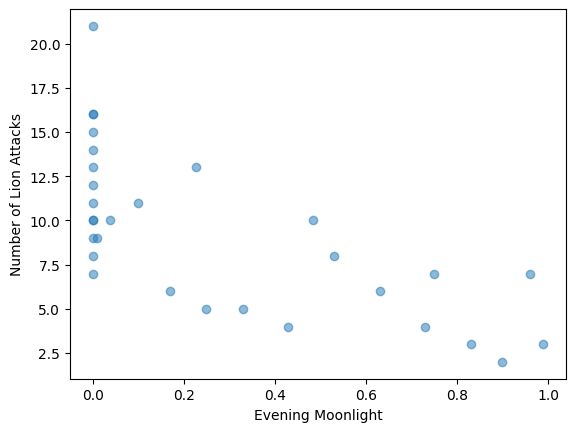

In [3]:
#a scatter plot between lion attacks and moonlight levels. 
plt.scatter(df['evening_moonlight'], df['attacks'], alpha=0.5)
plt.xlabel('Evening Moonlight')
plt.ylabel('Number of Lion Attacks')



In [5]:
#the graph shows that as the moonlight levels increase,
#evening lion attacks decrease. This indicates a negative relationship.
#modeling the relationship
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

class LinearModel:
    def __init__(self, model_name=""):
        self.model_name = model_name
        
    def fit(self, x, y):
        x = pd.DataFrame(x)
        linear_model = LinearRegression().fit(x, y)
        y_pred = linear_model.predict(x)
        self.slope = linear_model.coef_[0]
        self.intercept = linear_model.intercept_
        self.rsquared = r2_score(y, y_pred)
        
    def predict(self, x):
        return self.slope * x + self.intercept

    def plot_model(self, x_min, x_max, color="black"):
        y_min = self.predict(x_min)
        y_max = self.predict(x_max)
        plt.plot([x_min, x_max], [y_min, y_max], color=color)
        
    def print_model_info(self):
        m = self.slope
        b = self.intercept
        rsquared = self.rsquared
        model_name = self.model_name
        print(f'LinearModel({model_name}):')
        print(f'Parameters: slope = {m:.2f}, intercept = {b:.2f}')
        print(f'Equation: y = {m:.2f}x + {b:.2f}')
        print(f'Goodness of Fit (R²): {rsquared:.3f}')

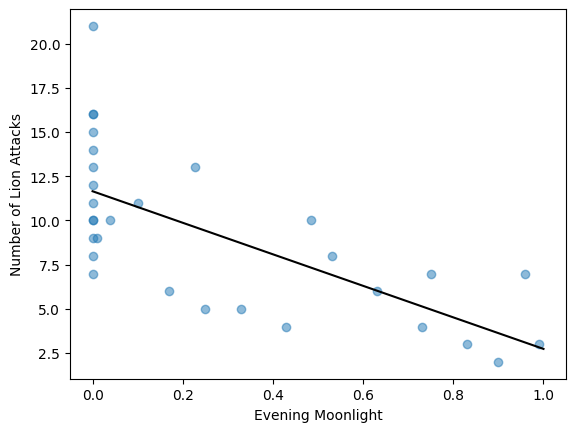

In [7]:
#creating a linear model
attack_model = LinearModel("attacks")
attack_model.fit(x=df['evening_moonlight'],y = df['attacks'])
plt.scatter(df['evening_moonlight'], df['attacks'], alpha=0.5)
plt.xlabel('Evening Moonlight')
plt.ylabel('Number of Lion Attacks')
attack_model.plot_model(0, 1)


In [8]:
#displaying model info
attack_model.print_model_info()

LinearModel(attacks):
Parameters: slope = -8.92, intercept = 11.65
Equation: y = -8.92x + 11.65
Goodness of Fit (R²): 0.475


In [9]:
#One plausible mechanism for the relationship is that moonlight also helps humans see lions at night and avoid attacks. 
#giving a supporting evidence with the belly size analysis 
df_belly = pd.read_csv("C:\\Users\\hp\\Downloads\\largest-islands-project\\lion-belly-sizes.csv")
df_belly #display the dataframe


,lunar_day,moonlight,belly_size
0,0,0.000,0.5005
1,1,0.003,0.5073
2,2,0.013,0.5032
3,3,0.033,0.4926
4,4,0.071,0.4897
5,5,0.125,0.4945
6,6,0.165,0.4847
7,7,0.287,0.4811
8,8,0.353,0.4851
9,9,0.472,0.4843


Text(0, 0.5, 'Lion Belly Size')

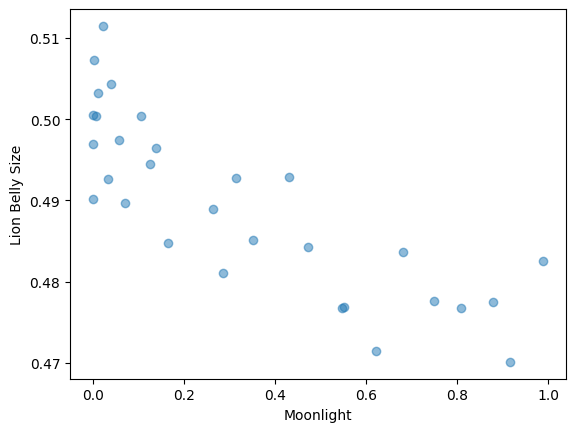

In [10]:
plt.scatter(df_belly['moonlight'], df_belly['belly_size'], alpha=0.5)
plt.xlabel('Moonlight')
plt.ylabel('Lion Belly Size')

In [11]:
belly_model = LinearModel("belly")
belly_model.fit(df_belly['moonlight'], df_belly['belly_size'])


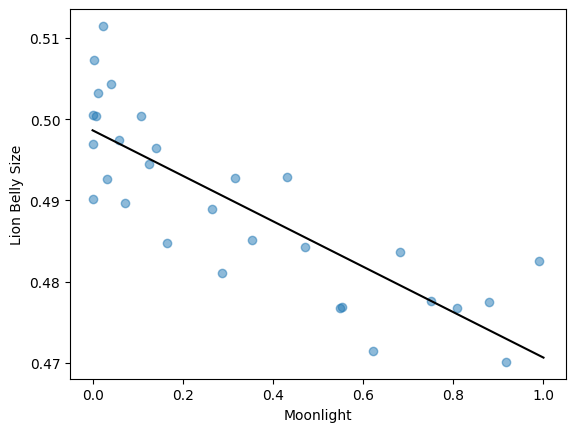

In [12]:
plt.scatter(df_belly['moonlight'], df_belly['belly_size'], alpha=0.5)
plt.xlabel('Moonlight')
plt.ylabel('Lion Belly Size')
belly_model.plot_model(0, 1)



In [13]:
#As the moonlight levels increase, average lion belly size decreases, indicating they had less to eat.
#Perhaps it really is harder to sneak up on your prey when they can see you! 
belly_model.print_model_info()



LinearModel(belly):
Parameters: slope = -0.03, intercept = 0.50
Equation: y = -0.03x + 0.50
Goodness of Fit (R²): 0.682


In [ ]:
#here the goodness of fit than previous model 
#this supports that lion attacks decrease as moonlight increase 
# perhaps there belly size also decreases which point they get to  eat less
